# Let's Grow More 
# Data Analytics Intership
# March 2022
# Name- Rutuja Shamrao Raykar
# Task 1
# Iris Flower Classification ML Project


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Importing the Datasets from CSV file

In [ ]:
iris_data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

In [ ]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [ ]:
columns=['sepal_lenght','sepal_width','petal_length','petal_width','class']

In [ ]:
iris_data.columns=columns
iris_data.head()

,sepal_lenght,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


# Understanding The Data

In [ ]:
iris_data.shape

(149, 5)

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_lenght  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
iris_data.describe()

,sepal_lenght,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#3 Missing Value's Imputation

In [ ]:
iris_data.isnull().sum()

sepal_lenght    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# Data Visualization

Box Plot

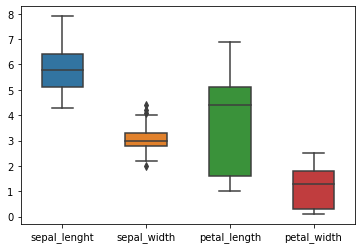

In [ ]:
sns.boxplot(data=iris_data,width=0.5,fliersize=5)
sns.set(rc={"figure.figsize":(6,6)})


Exploring the correlation between different columns

Heatmap

Index(['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

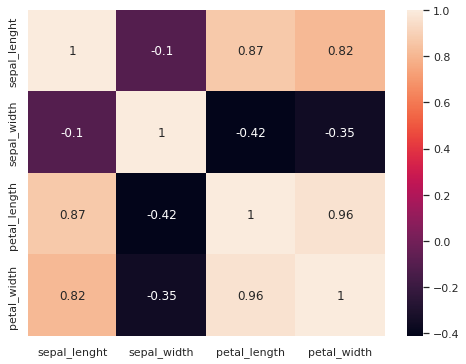

In [ ]:
from pandas.core.dtypes.inference import is_re_compilable
corr=iris_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)
iris_data.columns

# Violin Plot

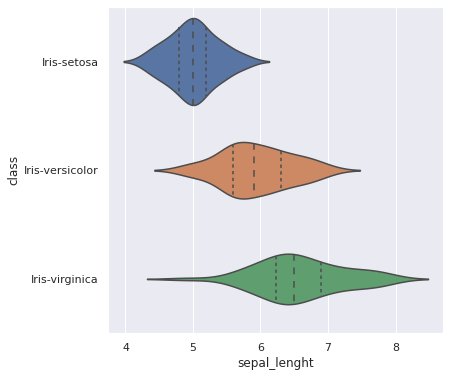

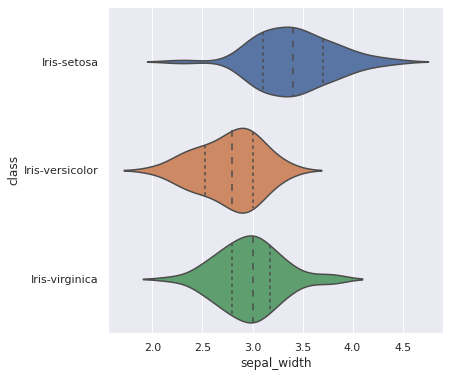

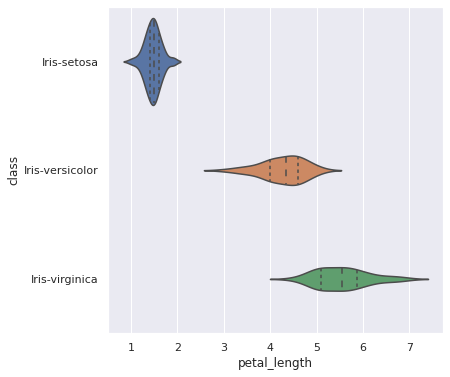

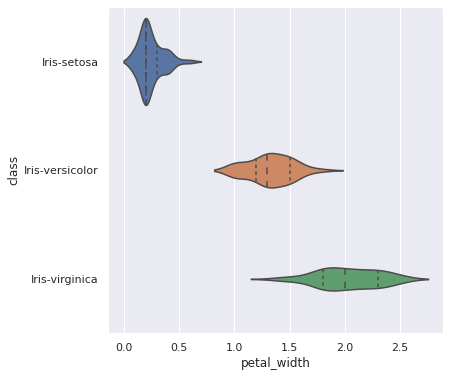

In [ ]:
sns.violinplot(y='class', x='sepal_lenght',data=iris_data,inner='quartile')
plt.show()
sns.violinplot(y='class',x='sepal_width',data=iris_data,inner='quartile')
plt.show()
sns.violinplot(y='class',x='petal_length',data=iris_data,inner='quartile')
plt.show()
sns.violinplot(y='class',x='petal_width',data=iris_data,inner='quartile')
plt.show() 

# Model Building

As we have measurement for which we know the correct species of iris,this is a supervised learning problem. We want to predict one of the several options of iris making it an example of a classification problem.
To test the model's performance, we show it new data for which we have labels. This is usually done by splitting the labelled data we have collected into two parts. One part of the data is used to build the machine learning model,and is called the trainning data or trainning set.The rest of the data will be used to test how well model works; this is called the test set,test data,or holdout set  

X is having all dependent variables

   Y is having an independent variables

In [ ]:
X=iris_data.drop(['class'],axis=1)
y=iris_data['class']
print(f'X shape:{X.shape} | y shape:{y.shape}')


X shape:(149, 4) | y shape:(149,)


train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((104, 4), (45, 4), (104,), (45,))

# Model Creation

In [ ]:
from sklearn.svm import SVC


In [ ]:
model=[]
model.append(('SVC',SVC(gamma='auto')))

# Model Building

In [ ]:
model=SVC(gamma='auto')
model.fit(X_train,y_train)
prediction=model.predict(X_test)

# Now checking the accuracy of model

In [ ]:
print(f'test accuracy:{accuracy_score(y_test,prediction)}')
print(f'Classification Report:\n{classification_report(y_test,prediction)}')

test accuracy:0.9555555555555556
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.92      0.92        12
 Iris-virginica       0.94      0.94      0.94        18

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Conclusion
** For this model,the accuracy on the test is 0.96,which means the model made the right prediction for 96% of the irises in the given dataset.We can expect the model to be correct 96% of the time for predicting of new irises. This is a high level of accuracy and it means that our model may be trustworthy enough to use.